# Rasterio

## Open a dataset

In [190]:
import rasterio
from rasterio import plot
from matplotlib import pyplot as plt
import numpy as np
dataset = rasterio.open('sentinel2_crop.tif')

In [191]:
dataset.name

'sentinel2_crop.tif'

In [192]:
dataset.mode

'r'

## Getting access to dataset's properties

Dataset objects have one or more bands. A band is a 2D array of values, representing the disribution of a variable in 2D space.

In [193]:
# Number of bands
dataset.count

4

Width and height

In [194]:
dataset.width

3030

In [195]:
dataset.height

2462

## Visualization

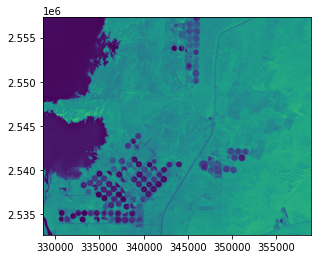

<AxesSubplot:>

In [196]:
from rasterio.plot import show
show(dataset)

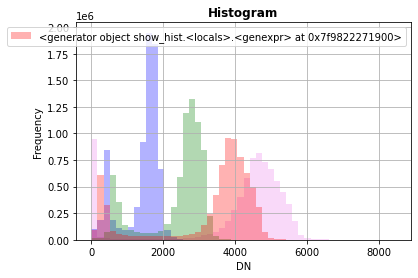

In [197]:
from rasterio.plot import show_hist
show_hist(dataset, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

## Dataset georeferencing

In [198]:
dataset.bounds

BoundingBox(left=328610.0, bottom=2532670.0, right=358910.0, top=2557290.0)

Affine transformation

In [199]:
dataset.transform

Affine(10.0, 0.0, 328610.0,
       0.0, -10.0, 2557290.0)

A dataset’s transform is an affine transformation matrix that maps pixel locations in (row, col) coordinates to (x, y) spatial positions. The product of this matrix and (0, 0), the row and column coordinates of the upper left corner of the dataset, is the spatial position of the upper left corner.

In [200]:
dataset.transform * (0, 0)

(328610.0, 2557290.0)

The position of the lower right corner:

In [201]:
dataset.transform * (dataset.width, dataset.height)

(358910.0, 2532670.0)

Coordinate reference system

In [202]:
dataset.crs

CRS.from_epsg(32636)

## Reading data to NumPy array

Data from a raster band can be accessed by the band’s index number. Following the GDAL convention, bands are indexed from 1.

In [203]:
dataset.indexes

(1, 2, 3, 4)

In [204]:
band1 = dataset.read(1)
band1

array([[ 226,  227,  234, ..., 4464, 4452, 4500],
       [ 233,  226,  213, ..., 4504, 4452, 4476],
       [ 229,  213,  213, ..., 4492, 4476, 4464],
       ...,
       [3794, 3784, 3564, ..., 4472, 4508, 4544],
       [3752, 3798, 3758, ..., 4524, 4532, 4612],
       [3914, 3764, 3768, ..., 4560, 4600, 4676]], dtype=uint16)

In [205]:
type(band1)

numpy.ndarray

In [206]:
band1.shape

(2462, 3030)

In [207]:
band1.ndim

2

In [208]:
band1.dtype

dtype('uint16')

Band statistics

In [209]:
bands = dataset.read()
i = 1
for band in bands:
    print(f"band {i}")
    print({
       'min': band.min(),
       'mean': band.mean(),
       'median': np.median(band),
       'max': band.max()})
    i += 1

band 1
{'min': 1, 'mean': 3263.702332349401, 'median': 3820.0, 'max': 7588}
band 2
{'min': 1, 'mean': 2368.813500253356, 'median': 2696.0, 'max': 7196}
band 3
{'min': 1, 'mean': 1414.0718719922359, 'median': 1608.0, 'max': 5604}
band 4
{'min': 1, 'mean': 4042.8374937331264, 'median': 4596.0, 'max': 8480}


## Calucation

Calculate NDVI

In [210]:
np.seterr(divide='ignore', invalid='ignore')

red = dataset.read(1).astype(float)
nir = dataset.read(4).astype(float)

ndvi = (nir - red) / (nir+red)

Save NDVI into a new raster

In [211]:
ndvi_file = rasterio.open('ndvi.tiff','w',driver='Gtiff',
                         width=dataset.width, height=dataset.height,
                         count=1,
                         crs=dataset.crs,
                         transform=dataset.transform,
                         dtype=str(ndvi.dtype)
                         )
ndvi_file.write(ndvi, 1)
ndvi_file.close()

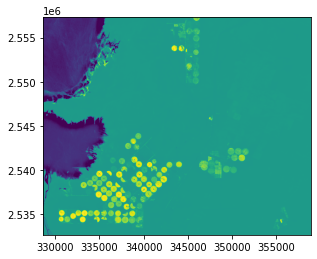

<AxesSubplot:>

In [212]:
src = rasterio.open(r"ndvi.tiff", count=3)
plot.show(src)

## Close a dataset

In [213]:
dataset.close()

## Using functions

Several functions
- Warp
- Calc
- Transform
- Clip
- Merge
- Mask
- Sample
- ...